In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [35]:

def carregar_e_preparar_dados(caminho_arquivo):

    dados = pd.read_csv(caminho_arquivo)
    X = dados.iloc[:, :-1].values  # Todas as colunas menos a última como entradas
    y = dados.iloc[:, -1].values   # Última coluna como saída
    X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)  # # Adicionando a coluna de 1 para calcular o bias
    return X, y



In [36]:

class Perceptron:
    def __init__(self, taxa_aprendizado=0.1, epocas=1000):
        self.taxa_aprendizado = taxa_aprendizado
        self.epocas = epocas
        self.pesos = None

    def prever(self, X):
        entrada_liquida = np.dot(X, self.pesos)  # Calcula a soma ponderada
        return np.where(entrada_liquida >= 0.0, 1, 0)  # Função de ativação degrau

    def ajustar(self, X, y):
        #Treina o Perceptron usando a Regra Delta.
        self.pesos = np.zeros(X.shape[1])  # Inicializa os pesos com zeros
        for epoca in range(self.epocas):
            for xi, alvo in zip(X, y):
                previsao = self.prever(xi)
                erro = alvo - previsao
                self.pesos += self.taxa_aprendizado * erro * xi



In [44]:

def treinar_e_avaliar(caminho_arquivo):
    # Carrega e prepara os dados
    X, y = carregar_e_preparar_dados(caminho_arquivo)
    # Divide os dados em conjuntos de treinamento e teste
    tamanho_treino = int(0.8 * len(X))
    X_treino, X_teste = X[:tamanho_treino], X[tamanho_treino:]
    y_treino, y_teste = y[:tamanho_treino], y[tamanho_treino:]

    # Cria e treina o Perceptron
    perceptron = Perceptron(taxa_aprendizado=0.1, epocas=1000)
    perceptron.ajustar(X_treino, y_treino)

    # Testa o Perceptron
    y_predito = np.array([perceptron.prever(xi) for xi in X_teste])
    acertos = np.sum(y_predito == y_teste)
    acuracia = acertos / len(y_teste)

    # Exibe as métricas
    print(f"Acurácia: {acuracia * 100:.2f}%")
    print(f"Pesos finais: {perceptron.pesos}")
    print(f"Total de acertos: {acertos} de {len(y_teste)}")

    # Visualização dos dados
    plot_(X, y, perceptron.pesos, 'Visualização dos Dados - Perceptron')


In [41]:
def plot_(X, y, weights, title):
    plt.figure(figsize=(12, 8))

    # Índices das características a serem plotadas
    feature1_index, feature2_index = 1, 2

    # Verificar se X tem colunas suficientes
    if X.shape[1] <= feature2_index:
        raise IndexError("A matriz de entrada não possui colunas suficientes para o índice de característica especificado.")

    # Plot dos pontos de dados
    plt.scatter(X[:, feature1_index], X[:, feature2_index], c=y, cmap='coolwarm', edgecolor='k', s=100, alpha=0.7, label='Dados')

    # Definindo o espaço para o contorno da linha de decisão
    x_min, x_max = X[:, feature1_index].min() - 1, X[:, feature1_index].max() + 1
    y_min, y_max = X[:, feature2_index].min() - 1, X[:, feature2_index].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    # Calculando a linha de decisão
    Z = np.dot(np.c_[np.ones((xx.ravel().shape[0], 1)), xx.ravel(), yy.ravel()], weights[[0, feature1_index, feature2_index]])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.2, colors=['red', 'blue'])

    # Anotações de pesos e acurácia
    plt.text(x_max - 2, y_min + 1, f'Pesos: {np.round(weights, 2)}', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.5))
    plt.xlabel('Glicose')
    plt.ylabel('BMI')
    plt.title(title)
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

Base Simplificada:
Acurácia: 100.00%
Pesos finais: [-89.1   27.1  -33.46]
Total de acertos: 20 de 20


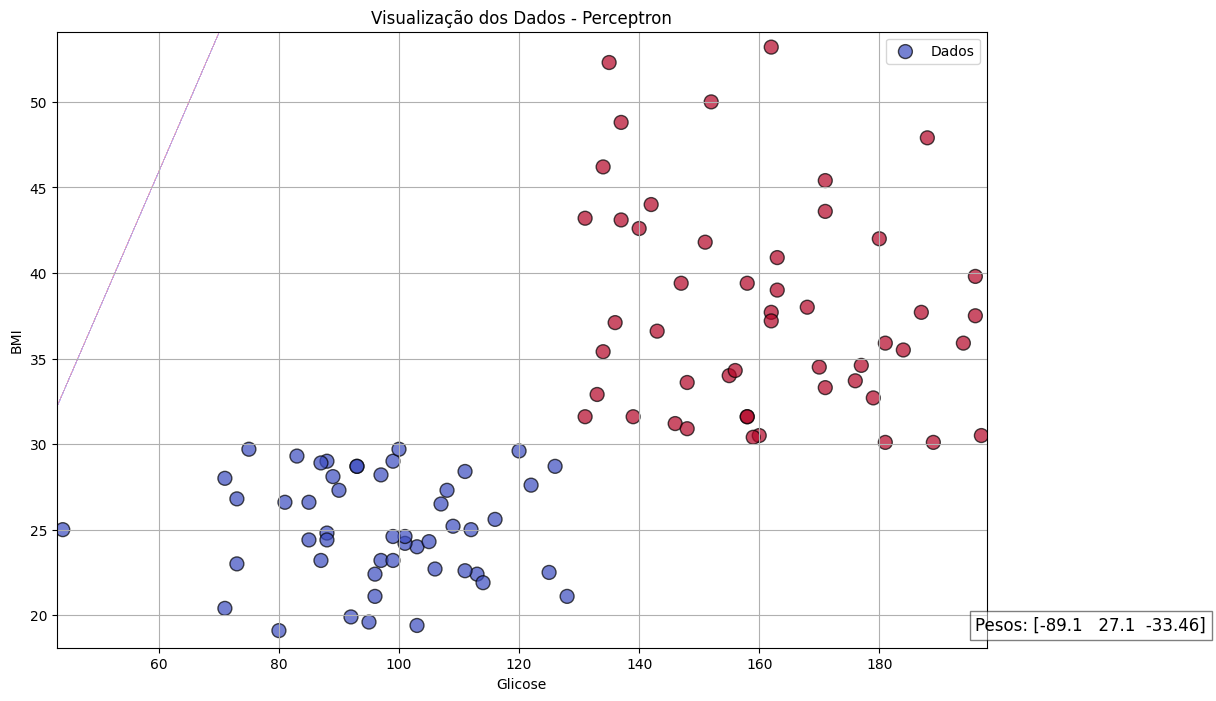

In [45]:

# Execução do treinamento e avaliação para a base simplificada
print("Base Simplificada:")
treinar_e_avaliar('simple_diabetes.csv')



Base Completa:
Acurácia: 50.65%
Pesos finais: [-1904.2      146.1       34.1      -33.3      -16.7       27.6
    26.85     385.9944   -21.5   ]
Total de acertos: 78 de 154


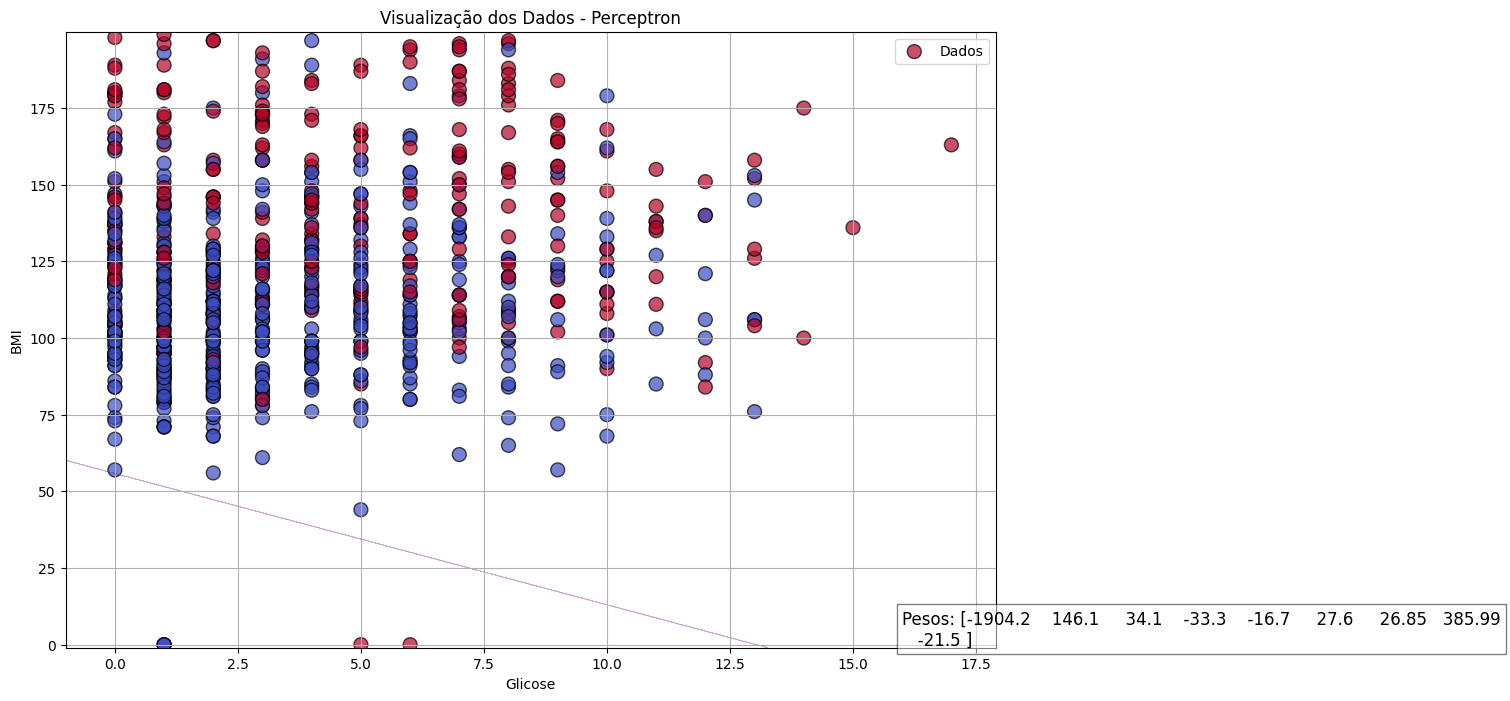

In [46]:
# Execução do treinamento e avaliação para a base completa
print("\nBase Completa:")
treinar_e_avaliar('diabetes.csv')


# A baixo é a função sem dividir o conjunto de treinamento e teste.

In [32]:
def treinar_e_avaliar_2(caminho_arquivo):
    # Carrega e prepara os dados
    X, y = carregar_e_preparar_dados(caminho_arquivo)

    # Cria e treina o Perceptron usando todos os dados
    perceptron = Perceptron(taxa_aprendizado=0.1, epocas=1000)
    perceptron.ajustar(X, y)

    # Testa o Perceptron usando os mesmos dados
    y_predito = np.array([perceptron.prever(xi) for xi in X])
    acertos = np.sum(y_predito == y)
    acuracia = acertos / len(y)

    # Exibe as métricas
    print(f"Acurácia: {acuracia * 100:.2f}%")
    print(f"Pesos finais: {perceptron.pesos}")
    print(f"Total de acertos: {acertos} de {len(y)}")

    # Visualização dos dados
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 1], X[:, 2], c=y, cmap='bwr', alpha=0.6)
    plt.xlabel('Glicose')
    plt.ylabel('BMI')
    plt.title('Visualização dos Dados - Perceptron')
    plt.grid(True)
    plt.show()


Base Completa:
Acurácia: 68.23%
Pesos finais: [-2372.1      146.6       13.4      -38.3      -17.7       15.4
    23.63     465.3041    -6.8   ]
Total de acertos: 524 de 768


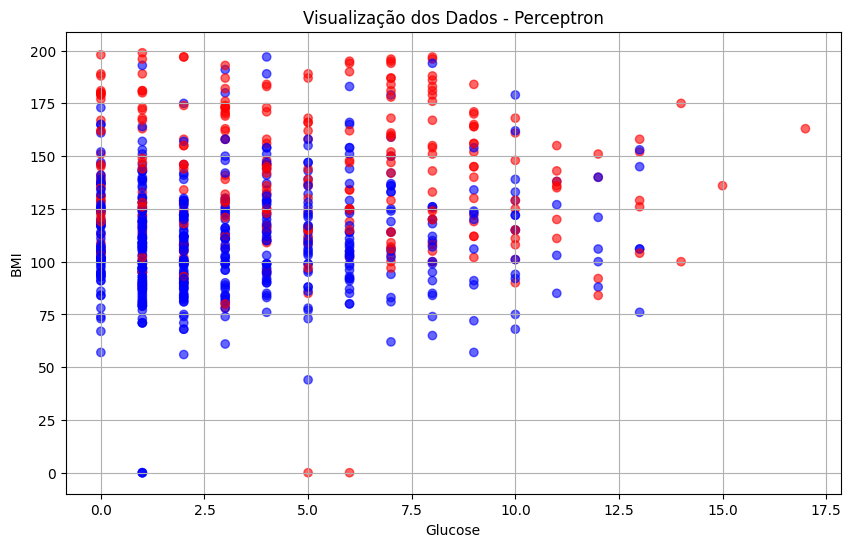

In [33]:
# Execução do treinamento e avaliação para a base completa
print("\nBase Completa:")
treinar_e_avaliar_2('diabetes.csv')